# Root-finding strategies

## Model problem

We consider the nonlinear function

$$
f(x) = x^3 - x + s = 0,
$$

where $s$ is a real number. Let $s = 1/2$ for the time being. As discussed below, we expect a root of $f(x) = 0$ near $x \simeq 1.2$. Let's confirm this first by plotting the function over an interval that contains this estimartion.


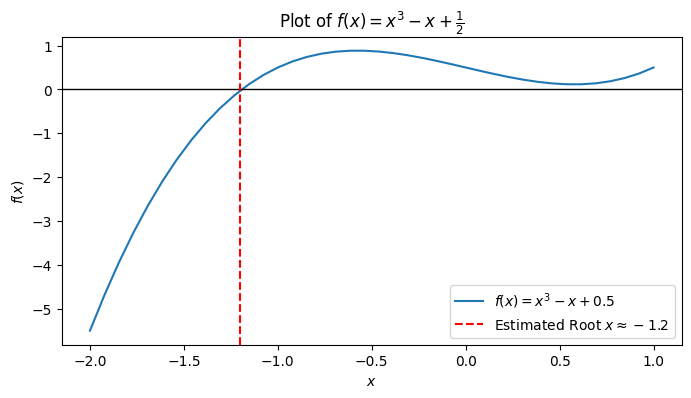

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**3 - x + 0.5

# Define the x-range for the plot
x_values = np.linspace(-2, 1, 40)
y_values = f(x_values)

# Estimated root location (based on our analysis)
x_est = -1.2

plt.figure(figsize=(8,4))
plt.plot(x_values, y_values, label='$f(x) = x^3 - x + 0.5$')
plt.axhline(0, color='black', linewidth=1)  # horizontal axis (f(x)=0)
plt.axvline(x_est, color='red', linestyle='--', label='Estimated Root $x \\approx -1.2$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Plot of $f(x)=x^3-x+\\frac{1}{2}$')
plt.legend()
plt.show()


### Expected Roots

A cubic equation of the form

$$
x^3 + p x + q = 0,
$$

with $p = -1$ and $q = \frac{1}{2}$ generally has three roots. The discriminant $\Delta$ of the cubic is given by

$$
\Delta = -4p^3 - 27q^2.
$$

Substituting the values,

$$
\Delta = -4(-1)^3 - 27\left(\frac{1}{2}\right)^2 = 4 - 27\left(0.25\right) = 4 - 6.75 = -2.75.
$$

Since $\Delta < 0$, the equation has one real root and a pair of complex conjugate roots.

Based on a few evaluations:
- $f(-1) = (-1)^3 - (-1) + \frac{1}{2} = -1 + 1 + 0.5 = 0.5$
- $f(-1.2)$ is close to zero

Thus, the real root is expected to be located approximately near $x \approx -1.2$. The other two roots are complex and will not be explored in detail here.

In the following cells, we will use three numerical methods (Fixed-Point Iteration, Bisection, and Newton-Krylov) to solve for this real root, and later compare the performance of these methods in terms of iterations and convergence speed.


### Fixed-Point Iteration

In the fixed-point approach, we re-arrange the equation into the form  
$$
x = g(x)
$$  
and iterate  
$$
x_{n+1} = g(x_n).
$$

A simple strategy is to choose an iteration of the form  
$$
x_{n+1} = x_n - \lambda f(x_n),
$$  
where $\lambda$ is a relaxation parameter chosen to ensure convergence (typically ensuring $|1-\lambda f'(x)| < 1$). In our example near the root, $|f'(x)|$ is around 3–4. We pick $\lambda=0.2$ so that the iteration remains contractive.


Fixed-Point Iteration:
Iteration  1, x = -1.10000000, |f(x)| = 2.690e-01
Iteration  2, x = -1.15380000, |f(x)| = 1.178e-01
Iteration  3, x = -1.17735973, |f(x)| = 4.533e-02
Iteration  4, x = -1.18642613, |f(x)| = 1.640e-02
Iteration  5, x = -1.18970702, |f(x)| = 5.792e-03
Iteration  6, x = -1.19086550, |f(x)| = 2.027e-03
Iteration  7, x = -1.19127088, |f(x)| = 7.070e-04
Iteration  8, x = -1.19141229, |f(x)| = 2.463e-04
Iteration  9, x = -1.19146156, |f(x)| = 8.580e-05
Iteration 10, x = -1.19147872, |f(x)| = 2.988e-05
Iteration 11, x = -1.19148469, |f(x)| = 1.040e-05
Iteration 12, x = -1.19148677, |f(x)| = 3.623e-06
Iteration 13, x = -1.19148750, |f(x)| = 1.262e-06
Iteration 14, x = -1.19148775, |f(x)| = 4.393e-07
Iteration 15, x = -1.19148784, |f(x)| = 1.530e-07
Iteration 16, x = -1.19148787, |f(x)| = 5.327e-08
Iteration 17, x = -1.19148788, |f(x)| = 1.855e-08
Iteration 18, x = -1.19148788, |f(x)| = 6.459e-09

Final estimate (Fixed-Point): x = -1.19148788


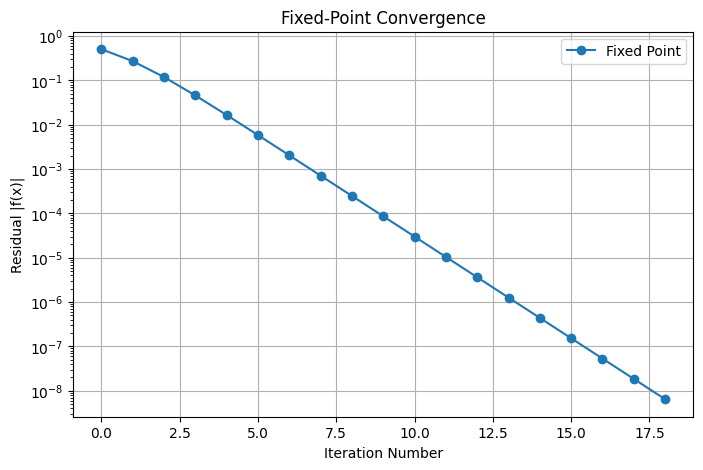

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative (for diagnostic purposes)
def f(x):
    return x**3 - x + 0.5

def fprime(x):
    return 3*x**2 - 1

# Fixed-point iteration: x_{n+1} = x_n - lambda * f(x_n)
lambda_fp = 0.2
tol = 1e-8
max_iter = 50

# We start from an initial guess near the estimated real root
x_fp = -1.0
iter_fp = 0
residuals_fp = [abs(f(x_fp))]

print("Fixed-Point Iteration:")
while abs(f(x_fp)) > tol and iter_fp < max_iter:
    x_fp = x_fp - lambda_fp * f(x_fp)
    iter_fp += 1
    residuals_fp.append(abs(f(x_fp)))
    print(f"Iteration {iter_fp:2d}, x = {x_fp: .8f}, |f(x)| = {abs(f(x_fp)):.3e}")

print("\nFinal estimate (Fixed-Point): x = {:.8f}".format(x_fp))

# Optionally, plot the convergence curve (residual vs iterations)
plt.figure(figsize=(8,5))
plt.semilogy(range(len(residuals_fp)), residuals_fp, 'o-', label='Fixed Point')
plt.xlabel('Iteration Number')
plt.ylabel('Residual |f(x)|')
plt.title('Fixed-Point Convergence')
plt.grid(True)
plt.legend()
plt.show()


### Bisection Method

The bisection method requires an interval $[a, b]$ where $f(a)$ and $f(b)$ have opposite signs. In this interval the Intermediate Value Theorem guarantees that a root exists.

At each iteration the interval is halved, and the sign of the function at the midpoint is used to determine the new interval. Although this method converges linearly, it is very robust.

For our problem, observe that $f(-2)$ is negative and $f(-1)$ is positive, so we choose $[-2, -1]$ as the starting interval.


Bisection Method:
Iteration  1, c = -1.50000000, |f(c)| = 1.375e+00
Iteration  2, c = -1.25000000, |f(c)| = 2.031e-01
Iteration  3, c = -1.12500000, |f(c)| = 2.012e-01
Iteration  4, c = -1.18750000, |f(c)| = 1.294e-02
Iteration  5, c = -1.21875000, |f(c)| = 9.152e-02
Iteration  6, c = -1.20312500, |f(c)| = 3.841e-02
Iteration  7, c = -1.19531250, |f(c)| = 1.252e-02
Iteration  8, c = -1.19140625, |f(c)| = 2.660e-04
Iteration  9, c = -1.19335938, |f(c)| = 6.112e-03
Iteration 10, c = -1.19238281, |f(c)| = 2.919e-03
Iteration 11, c = -1.19189453, |f(c)| = 1.326e-03
Iteration 12, c = -1.19165039, |f(c)| = 5.297e-04
Iteration 13, c = -1.19152832, |f(c)| = 1.318e-04
Iteration 14, c = -1.19146729, |f(c)| = 6.713e-05
Iteration 15, c = -1.19149780, |f(c)| = 3.232e-05
Iteration 16, c = -1.19148254, |f(c)| = 1.740e-05
Iteration 17, c = -1.19149017, |f(c)| = 7.461e-06
Iteration 18, c = -1.19148636, |f(c)| = 4.971e-06
Iteration 19, c = -1.19148827, |f(c)| = 1.245e-06
Iteration 20, c = -1.19148731, |

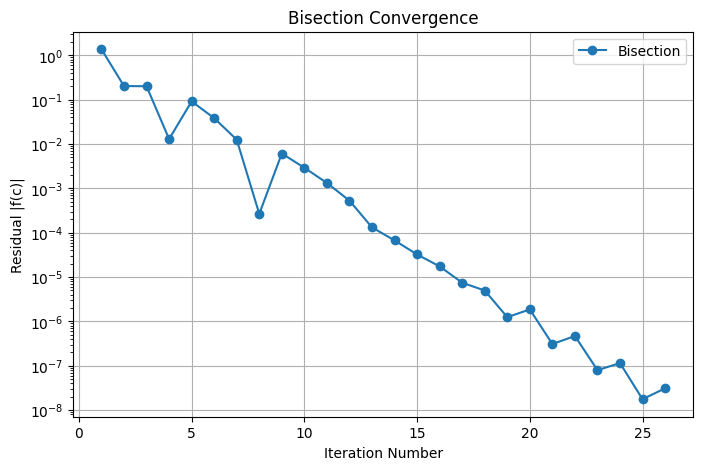

In [3]:
# Bisection method for f(x) = x^3 - x + 0.5 = 0

a, b = -2.0, -1.0  # initial interval: f(a)*f(b) < 0 is satisfied here
tol_bisect = 1e-8
iter_bisect = 0
residuals_bisect = []

# Ensure the initial interval is valid
fa, fb = f(a), f(b)
if fa * fb >= 0:
    raise ValueError("f(a) and f(b) must have opposite signs.")

print("Bisection Method:")
while (b - a) / 2 > tol_bisect:
    c = (a + b) / 2  # midpoint
    fc = f(c)
    iter_bisect += 1
    residuals_bisect.append(abs(fc))
    print(f"Iteration {iter_bisect:2d}, c = {c: .8f}, |f(c)| = {abs(fc):.3e}")

    # Determine the subinterval in which the root lies
    if fa * fc < 0:
        b = c
        fb = fc
    else:
        a = c
        fa = fc

root_bisect = (a + b) / 2
print("\nFinal estimate (Bisection): x = {:.8f}".format(root_bisect))

# Plot convergence (residual vs iterations)
plt.figure(figsize=(8,5))
plt.semilogy(range(1, len(residuals_bisect)+1), residuals_bisect, 'o-', label='Bisection')
plt.xlabel('Iteration Number')
plt.ylabel('Residual |f(c)|')
plt.title('Bisection Convergence')
plt.grid(True)
plt.legend()
plt.show()


### Newton-Krylov Method
 
In one dimension, Newton’s method can be written as:  
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

which comes from straightforward application of Taylor Series of $f(x)$ about the root, i.e., let  $f(x_{n+1}) = f(x_n) + f'(x_n) \Delta x$ and assume $f(x_{n+1}) \simeq 0$. In high dimensions, Newton-Krylov solvers use Krylov subspace methods (like GMRES) to solve the linear system without forming the Jacobian explicitly.

Here, for illustration we implement the one-dimensional Newton update. We also record the iteration count and residual to compare its performance.


Newton-Krylov (Newton's) Method:
Iteration  1, x = -1.25000000, |f(x)| = 2.031e-01
Iteration  2, x = -1.19491525, |f(x)| = 1.121e-02
Iteration  3, x = -1.19150070, |f(x)| = 4.176e-05
Iteration  4, x = -1.19148788, |f(x)| = 5.868e-10

Final estimate (Newton-Krylov): x = -1.19148788


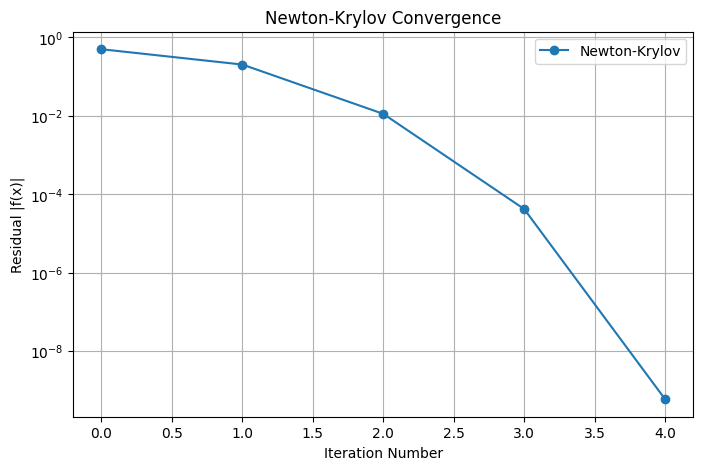

In [4]:
# Newton-Krylov (Newton's method in 1-D for demonstration)
x_newton = -1.0  # initial guess
tol_newton = 1e-8
max_iter_newton = 50
iter_newton = 0
residuals_newton = [abs(f(x_newton))]

print("Newton-Krylov (Newton's) Method:")
while abs(f(x_newton)) > tol_newton and iter_newton < max_iter_newton:
    # Newton update: x_new = x_old - f(x_old)/f'(x_old)
    # In a full Newton-Krylov approach, we would use a Krylov solver to solve J*delta = -f(x)
    # Here in 1-D we solve directly.
    x_newton = x_newton - f(x_newton) / fprime(x_newton)
    iter_newton += 1
    residuals_newton.append(abs(f(x_newton)))
    print(f"Iteration {iter_newton:2d}, x = {x_newton: .8f}, |f(x)| = {abs(f(x_newton)):.3e}")

print("\nFinal estimate (Newton-Krylov): x = {:.8f}".format(x_newton))

# Plot convergence (residual vs iterations)
plt.figure(figsize=(8,5))
plt.semilogy(range(len(residuals_newton)), residuals_newton, 'o-', label='Newton-Krylov')
plt.xlabel('Iteration Number')
plt.ylabel('Residual |f(x)|')
plt.title('Newton-Krylov Convergence')
plt.grid(True)
plt.legend()
plt.show()


#### Performance Comparison

Here we compare the three methods in terms of the number of iterations required and the decay of the residual $|f(x)|$.

- **Fixed-point iteration** (with a relaxation parameter $\lambda=0.2$) generally converges linearly and may require more iterations.
- **Bisection** is robust with guaranteed convergence but also converges linearly and its convergence speed depends directly on the interval width.
- **Newton-Krylov (Newton's) method** converges quadratically near the root (provided the initial guess is sufficiently close), hence it typically uses fewer iterations.

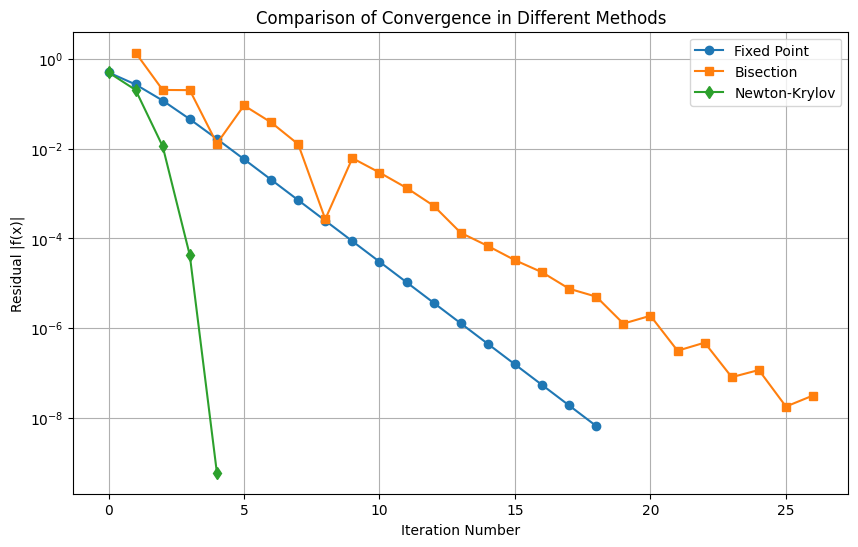

In [5]:
plt.figure(figsize=(10,6))
plt.semilogy(range(len(residuals_fp)), residuals_fp, 'o-', label='Fixed Point')
plt.semilogy(range(1, len(residuals_bisect)+1), residuals_bisect, 's-', label='Bisection')
plt.semilogy(range(len(residuals_newton)), residuals_newton, 'd-', label='Newton-Krylov')
plt.xlabel('Iteration Number')
plt.ylabel('Residual |f(x)|')
plt.title('Comparison of Convergence in Different Methods')
plt.grid(True)
plt.legend()
plt.show()


## Advanced: arc-length continuation

Let us use this strategy for $f(x,s)=x^3-x+s=0$. Recall that for $s = 1/2$, $x \simeq -1.19$ is the only real root. Also, for $s = 0$, note that $x = -1$ is also a solution.

**Arc-length continuation** is a robust numerical method for following solution branches through turning points. Instead of treating $s$ as the independent parameter, we reparameterize the branch by its arc-length $\ell$. We define
$$
\mathbf{u}=\begin{bmatrix} x \\ s \end{bmatrix},
$$
and augment the system with an arc-length constraint:
$$
(\mathbf{u}-\mathbf{u}_0)^T\mathbf{v}-\Delta \ell=0,
$$
where $\mathbf{u}_0$ is the previous solution, $\mathbf{v}$ is the unit tangent, and $\Delta\ell$ is the step size.

**Key Steps:**

1. **Predictor:**  
   Given $\mathbf{u}_0=[x_0,s_0]^T$, compute the tangent $\mathbf{v}$ by setting
   $$
   \frac{dx}{d\ell}=-\frac{f_s}{f_x}\quad \text{and}\quad \frac{ds}{d\ell}=1.
   $$
   Then predict
   $$
   \mathbf{u}_{\rm pred}=\mathbf{u}_0+\Delta\ell\,\mathbf{v}.
   $$

2. **Corrector:**  
   Solve the augmented system
   $$
   \begin{cases}
   f(x,s)=0,\\[1mm]
   (\mathbf{u}-\mathbf{u}_0)^T\mathbf{v}-\Delta\ell=0,
   \end{cases}
   $$
   using a Newton (or Newton–Krylov) method.

3. **Adaptive Step:**  
   If a full step overshoots the target parameter $s_f$, adjust $\Delta\ell$ so that $s$ reaches $s_f$ exactly:
   $$
   \Delta\ell=\frac{s_f-s}{v_s}.
   $$

**Our Example:**  
Starting from $\mathbf{u}_0=[-1,0]^T$, we use arc-length continuation to reach $s_f=0.5$, which should recover the solution $x\approx-1.19$. The method allows us to track the branch smoothly despite folds in the $(x,s)$-plane.


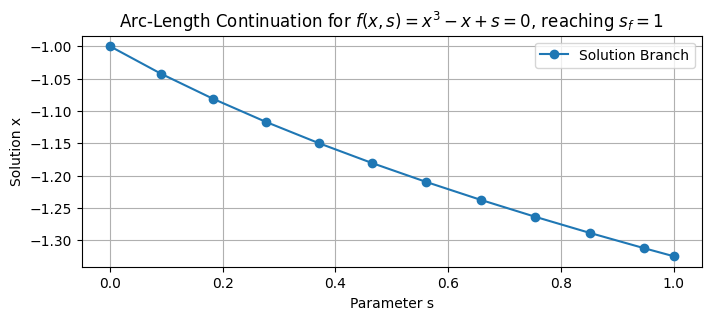

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the nonlinear function and its partial derivatives
def f(x, s):
    return x**3 - x + s

def df_dx(x, s):
    return 3*x**2 - 1

def df_ds(x, s):
    return 1

# Newton-Krylov corrector for the augmented system.
# The augmented system contains:
#   1. f(x, s) = 0, and
#   2. (u - u0) dot tangent - step = 0,
#      where u = [x, s]^T and the second equation enforces a prescribed arc-length step.
def newton_corrector(u0, u_pred, step, tangent, tol=1e-8, max_iter=20):
    u = u_pred.copy()
    for i in range(max_iter):
        x, s = u
        # Evaluate the augmented function:
        F1 = f(x, s)
        F2 = np.dot(u - u0, tangent) - step
        F = np.array([F1, F2])
        
        # Check convergence:
        if np.linalg.norm(F) < tol:
            break
        
        # Jacobian of the augmented system:
        J11 = df_dx(x, s)
        J12 = df_ds(x, s)
        J21 = tangent[0]
        J22 = tangent[1]
        J = np.array([[J11, J12],
                      [J21, J22]])
        
        # Solve for the Newton update:
        delta = np.linalg.solve(J, -F)
        u = u + delta
    return u

# Compute an approximate tangent to the solution branch at (x, s).
# Differentiating f(x,s)=0 with respect to arc-length l yields:
#   f_x * (dx/dl) + f_s * (ds/dl) = 0.
# For simplicity, we choose ds/dl = 1 so that dx/dl = -f_s/f_x.
def compute_tangent(x, s):
    if abs(df_dx(x, s)) < 1e-8:
        dxds = 0.0
    else:
        dxds = -df_ds(x, s) / df_dx(x, s)
    tangent = np.array([dxds, 1.0])
    tangent = tangent / np.linalg.norm(tangent)
    return tangent

# --- Continuation Parameters ---
s_f = 1.0            # desired final parameter value (try s_f = 0.5 to recover x ~ -1.19)
step_size = 0.1      # default arc-length step size

# --- Initial solution on the branch ---
# Choose the branch starting at x = -1 for s = 0.
u0 = np.array([-1.0, 0.0])
tangent = compute_tangent(u0[0], u0[1])
u_current = u0.copy()

# --- Main Arc-Length Continuation Loop ---
solutions = [u0.copy()]

# Continue until the parameter s in the current solution reaches s_f.
while u_current[1] < s_f:
    # Compute the predicted new solution. 
    # First, check if a full step would overshoot s_f.
    s_pred_full = u_current[1] + step_size * tangent[1]
    if s_pred_full > s_f:
        # Compute the arc-length increment (dl) needed to exactly reach s = s_f.
        dl = (s_f - u_current[1]) / tangent[1]
    else:
        dl = step_size
    # Predictor step: move along the tangent by dl.
    u_pred = u_current + dl * tangent
    # Corrector step: solve the augmented system starting from the predicted solution.
    u_new = newton_corrector(u_current, u_pred, dl, tangent)
    solutions.append(u_new)
    # Update the tangent using the new solution.
    tangent = compute_tangent(u_new[0], u_new[1])
    u_current = u_new

# Convert the solution list to an array.
solutions = np.array(solutions)

# --- Plot the Resulting Branch in the (s, x) Plane ---
plt.figure(figsize=(8, 3))
plt.plot(solutions[:, 1], solutions[:, 0], 'o-', label='Solution Branch')
plt.xlabel('Parameter s')
plt.ylabel('Solution x')
plt.title(r'Arc-Length Continuation for $f(x,s)=x^3-x+s=0$, reaching $s_f=%g$' % s_f)
plt.legend()
plt.grid(True)
plt.show()


## A problem from Hydraulics: finding the flow rate and friction factor in a hydraulic facility

We wish to determine the flow rate $Q$ and the Darcy friction factor $\lambda$ for a hydraulic facility governed by the equation

$$
\rho g H = \frac{8 \rho Q^2}{\pi^2 D^4}\Biggl(\lambda \frac{L}{D} + 1\Biggr),
$$

with the following parameters:
- $\rho = 1000\; \mathrm{kg/m^3}$ (density of water),
- $g = 9.8\; \mathrm{m/s^2}$,
- $H = 10\; \mathrm{m}$ (total head),
- $D = 0.1\; \mathrm{m}$ (pipe diameter),
- $L = 40\; \mathrm{m}$ (pipe length).

The Darcy friction factor $\lambda$ is given by the nonlinear Colebrook equation

$$
\frac{1}{\sqrt{\lambda}} = -2 \log_{10}\Biggl( \frac{\epsilon}{3.7\,D} + \frac{2.51}{Re\,\sqrt{\lambda}} \Biggr),
$$

where 
- the Reynolds number is $Re = \dfrac{4 Q}{\nu D}$,
- $\nu = \mu/\rho$ is the kinematic viscosity (for water, assuming $\mu = 1\times 10^{-3}\; \mathrm{Pa\cdot s}$, then $\nu = 1\times 10^{-6}\; \mathrm{m^2/s}$),
- and $\epsilon$ is the roughness of the pipe wall (here we assume $\epsilon = 1\times 10^{-4}\; \mathrm{m}$).

Because the system consists of two nonlinear equations (one for the hydraulic energy balance and one from the Colebrook formula), we must solve simultaneously for $Q$ and $\lambda$. In the fixed-point iteration, we will “lag” the Colebrook update by using an initial estimate for $\lambda$ from the limiting case $Re\to\infty$. In that limit, the Colebrook equation reduces to

$$
\frac{1}{\sqrt{\lambda}} = -2 \log_{10}\Biggl(\frac{\epsilon}{3.7\,D}\Biggr),
$$

from which an initial guess for $\lambda$ can be obtained.


### Built-in solvers

In this approach we solve the system of equations

1. **Hydraulic Energy Equation:**

   $$
   \rho g H = \frac{8 \rho Q^2}{\pi^2 D^4}\Biggl(\lambda \frac{L}{D} + 1\Biggr)
   $$

2. **Colebrook Equation:**

   $$
   \frac{1}{\sqrt{\lambda}} = -2 \log_{10}\Biggl( \frac{\epsilon}{3.7\,D} + \frac{2.51}{Re\,\sqrt{\lambda}} \Biggr),
   $$
   
   with $Re=\dfrac{4Q}{\nu D}$.

We will use SciPy's `fsolve` to solve for $Q$ and $\lambda$ simultaneously.


In [7]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Given parameters
rho = 1e3      # kg/m^3
g = 9.8        # m/s^2
H = 10         # m
D = 0.1        # m
L = 40         # m
epsilon = 1e-4 # m
mu = 1e-3      # Pa.s
nu = mu / rho  # m^2/s

def equations(x):
    Q, lam = x  # x[0]=Q, x[1]=lambda
    # Hydraulic energy balance equation:
    eq1 = rho * g * H - (8 * rho * Q**2 / (np.pi**2 * D**4)) * (lam * (L/D) + 1)
    
    # Reynolds number:
    Re = 4 * Q / (nu * D)
    # Colebrook equation:
    eq2 = 1/np.sqrt(lam) + 2 * np.log10( (epsilon/(3.7*D)) + (2.51/(Re*np.sqrt(lam))) )
    
    return [eq1, eq2]

# Initial guess: For Q we choose an order-of-magnitude guess, and for lambda we use the infinite Re limit:
# For Re -> infinity:
lam_guess = 1/(4*(np.log10(epsilon/(3.7*D)))**2)  # from 1/sqrt(lambda)= -2 log10(epsilon/(3.7D))
Q_guess = 0.1  # arbitrary initial guess (m^3/s)
initial_guess = [Q_guess, lam_guess]

solution, infodict, ier, mesg = fsolve(equations, initial_guess, full_output=True)

if ier == 1:
    Q_sol, lam_sol = solution
    print("Solution using fsolve:")
    print("Flow rate Q = {:.6f} m^3/s".format(Q_sol))
    print("Darcy friction factor lambda = {:.6f}".format(lam_sol))
else:
    print("fsolve did not converge:", mesg)

Solution using fsolve:
Flow rate Q = 0.036777 m^3/s
Darcy friction factor lambda = 0.019847


### Fixed-Point Iteration with Lagged Colebrook

In this approach we use a fixed-point iteration where the hydraulic equation is solved explicitly for $Q$ using a lagged (frozen) value of $\lambda$, and then $\lambda$ is updated using the Colebrook equation.

**Step 1:** Given a current guess for $\lambda$, compute $Q$ from the hydraulic balance equation:

$$
\rho g H = \frac{8 \rho Q^2}{\pi^2 D^4}\Biggl(\lambda \frac{L}{D} + 1\Biggr)
$$

which implies

$$
Q = \sqrt{\frac{\pi^2 D^4\,\rho\,g\,H}{8\rho \left(\lambda\,L/D + 1\right)}} 
= \frac{\pi D^2}{2\sqrt{2}} \sqrt{\frac{g H}{\lambda\,L/D + 1}}.
$$

**Step 2:** With the new $Q$, update $\lambda$ using the Colebrook equation in fixed-point form:

$$
\frac{1}{\sqrt{\lambda_{\text{new}}}} = -2 \log_{10}\Biggl( \frac{\epsilon}{3.7\,D} + \frac{2.51}{Re\,\sqrt{\lambda_{\text{old}}}} \Biggr),
$$

where

$$
Re = \frac{4Q}{\nu D}.
$$

Start with an initial guess for $\lambda$ obtained from the infinite Reynolds number limit

$$
\lambda_0 = \frac{1}{4\Bigl[\log_{10}\Bigl(\frac{\epsilon}{3.7\,D}\Bigr)\Bigr]^2}.
$$

Iterate these two steps until convergence.


Iteration  1: Q = 0.036952 m^3/s, lambda = 0.019847, error = 1.065e-02
Iteration  2: Q = 0.036777 m^3/s, lambda = 0.019847, error = 4.763e-03
Iteration  3: Q = 0.036777 m^3/s, lambda = 0.019847, error = 2.805e-06
Iteration  4: Q = 0.036777 m^3/s, lambda = 0.019847, error = 1.647e-09

Fixed-Point Iteration Converged:
Flow rate Q = 0.036777 m^3/s
Darcy friction factor lambda = 0.019847


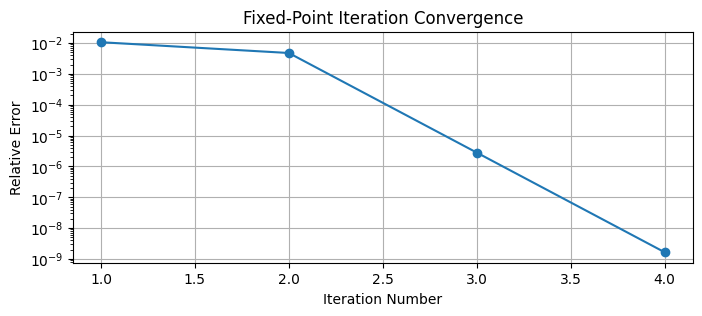

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters (same as before)
rho = 1e3      # kg/m^3
g = 9.8        # m/s^2
H = 10         # m
D = 0.1        # m
L = 40         # m
epsilon = 1e-4 # m
mu = 1e-3      # Pa.s
nu = mu / rho  # m^2/s

# Function to update Q from hydraulic equation given lambda
def compute_Q(lam):
    # Q = (pi*D^2)/(2*sqrt(2)) * sqrt( gH / (lam*L/D + 1) )
    return (np.pi * D**2 / (2*np.sqrt(2))) * np.sqrt(g * H / (lam*(L/D) + 1))

# Function to update lambda from Colebrook equation given Q and previous lambda (lagged)
def update_lambda(Q, lam_old):
    Re = 4 * Q / (nu * D)
    # Fixed-point update from Colebrook:
    # 1/sqrt(lambda_new) = -2 log10( epsilon/(3.7*D) + 2.51/(Re*sqrt(lam_old)) )
    inv_sqrt_lam = -2 * np.log10( (epsilon/(3.7*D)) + (2.51/(Re * np.sqrt(lam_old))) )
    lam_new = 1 / (inv_sqrt_lam**2)
    return lam_new

# Initial guess for lambda from the infinite Re limit
lam0 = 1/(4*(np.log10(epsilon/(3.7*D)))**2)
lam_iter = lam0
Q_iter = compute_Q(lam_iter)

tol = 1e-8
max_iter = 50
err = 1.0
iter_count = 0

# Lists for tracking convergence
Q_values = [Q_iter]
lam_values = [lam_iter]
residuals = []

while err > tol and iter_count < max_iter:
    Q_new = compute_Q(lam_iter)
    lam_new = update_lambda(Q_new, lam_iter)
    
    # Compute errors in Q and lambda (using relative error)
    err = max(abs(Q_new - Q_iter)/Q_new, abs(lam_new - lam_iter)/lam_new)
    
    Q_iter, lam_iter = Q_new, lam_new
    Q_values.append(Q_iter)
    lam_values.append(lam_iter)
    residuals.append(err)
    
    iter_count += 1
    print(f"Iteration {iter_count:2d}: Q = {Q_iter:.6f} m^3/s, lambda = {lam_iter:.6f}, error = {err:.3e}")

print("\nFixed-Point Iteration Converged:")
print("Flow rate Q = {:.6f} m^3/s".format(Q_iter))
print("Darcy friction factor lambda = {:.6f}".format(lam_iter))

# Plot convergence of residual error vs iterations
plt.figure(figsize=(8,3))
plt.semilogy(range(1, len(residuals)+1), residuals, 'o-')
plt.xlabel('Iteration Number')
plt.ylabel('Relative Error')
plt.title('Fixed-Point Iteration Convergence')
plt.grid(True)
plt.show()


## An example from hydrodynamic stability theory: dispersion relation

We consider the dispersion relation

$$
D(k,\omega)=S\Bigl(1+\Lambda-\frac{\omega}{k}\Bigr)^2+\Bigl(1-\Lambda-\frac{\omega}{k}\Bigr)^2-k=0,
$$

that dictates the stability properties of a shear layer. In a *temporal stability analysis*, $k$ represents the wavelength of a perturbation added to the system. The (complex) frequency, obtained as the solution of the above equation, is given by

$$
\omega=\omega_r+i\,\omega_i.
$$

where $\omega_i$ is the growth rate. If $\omega_i > 0$ the system is said to be temporally unstable. In this formulation the spatial wavenumber $k$ is a real parameter, and the dispersion relation generally yields two branches for $\omega$. In our analysis we focus on the upper branch corresponding to unstable behavior (i.e. $\omega_i > 0$).

### Numerical Strategy

For each fixed $k$, we solve the complex equation $D(k,\omega)=0$ directly using a built-in solver (e.g. SciPy’s `newton` method) that handles complex-valued functions. We begin at a small $k$ (e.g. $k=10^{-4}$) with an initial guess for $\omega$ (chosen to have a small positive imaginary part). By "continuation" in $k$ – i.e. by using the previous solution as the new initial guess – we track the upper branch and extract the real and imaginary parts, $\omega_r(k)$ and $\omega_i(k)$, respectively.


> Example taken from: Juniper et al., *Modal Stability TheoryLecture notes from the FLOW-NORDITA Summer School on Advanced Instability Methods for Complex Flows*, Stockholm, Sweden, 20131

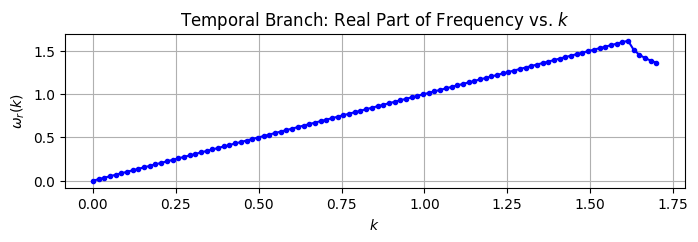

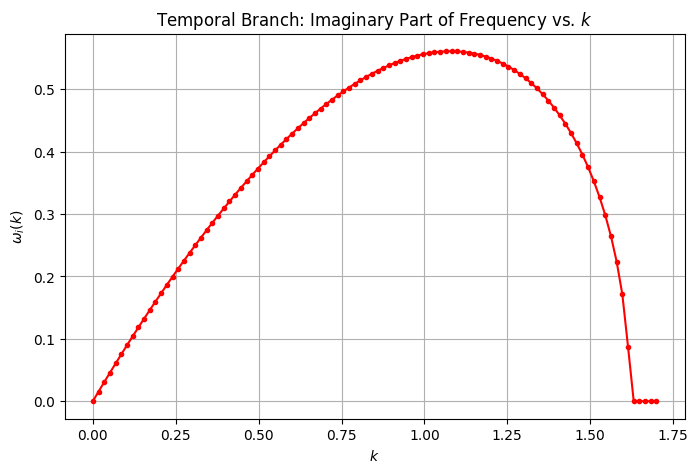

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# --- Parameters ---
S = 1.0
Lambda = 0.9

# --- Dispersion Relation Function ---
# The function returns the complex value of D(k, omega) for fixed k.
def D_complex(omega, k):
    # omega is a complex number; k is real.
    return S*(1 + Lambda - omega/k)**2 + (1 - Lambda - omega/k)**2 - k

# --- Set up a range of k values ---
# Use a small nonzero starting value to avoid division-by-zero.
k_values = np.linspace(1e-4, 1.7, 100)

# Prepare an array to store omega for the upper branch.
omega_values = np.zeros_like(k_values, dtype=complex)

# --- Compute the upper branch ---
# For the upper branch we expect a positive imaginary part.
# Use an initial guess with a small positive imaginary part.
guess = 0 + 0.1j

for i, k in enumerate(k_values):
    # newton from scipy.optimize works with complex functions.
    omega_sol = newton(lambda w: D_complex(w, k), guess)
    omega_values[i] = omega_sol
    # Use current solution as guess for next k to ensure continuity.
    guess = omega_sol

# Separate the real and imaginary parts of omega.
omega_r = omega_values.real
omega_i = omega_values.imag

# --- Plot: Real Part of ω versus k ---
plt.figure(figsize=(8, 2))
plt.plot(k_values, omega_r, 'b.-')
plt.xlabel(r'$k$')
plt.ylabel(r'$\omega_r(k)$')
plt.title('Temporal Branch: Real Part of Frequency vs. $k$')
plt.grid(True)
plt.show()

# --- Plot: Imaginary Part of ω versus k ---
plt.figure(figsize=(8, 5))
plt.plot(k_values, omega_i, 'r.-')
plt.xlabel(r'$k$')
plt.ylabel(r'$\omega_i(k)$')
plt.title('Temporal Branch: Imaginary Part of Frequency vs. $k$')
plt.grid(True)
plt.show()
